In [1]:
from EXP2_clean_balance import clean_and_balance_csv_files  # Import the function
combined_deleted_df, balanced_dataframes, metrics_table, all_balanced_metrics = clean_and_balance_csv_files()
### PURPOSE: Save final balanced dataframe into finalEXP2.csv ###


📂 Processing: EXP2results55images.csv
Rows before cleaning:
  📥 Total rows: 1650
  Task pie: 825 rows, 55 unique images
  Task bar: 825 rows, 55 unique images
 Total tasks: 1650
Total tasks: 1650

Original Dataset Sizes:
Bar chart rows: 680
Pie chart rows: 678

Balanced Dataset Sizes:
Bar chart rows: 677
Pie chart rows: 677
Deleted rows: 292

📂 Processing: EXP2results55images.csv
Rows before cleaning:
  📥 Total rows: 1650
  Task pie: 825 rows, 55 unique images
  Task bar: 825 rows, 55 unique images
 Total tasks: 1650
Total tasks: 1650

Original Dataset Sizes:
Bar chart rows: 701
Pie chart rows: 678

Balanced Dataset Sizes:
Bar chart rows: 677
Pie chart rows: 677
Deleted rows: 271

📂 Processing: EXP2results55images.csv
Rows before cleaning:
  📥 Total rows: 1650
  Task pie: 825 rows, 55 unique images
  Task bar: 825 rows, 55 unique images
 Total tasks: 1650
Total tasks: 1650

Original Dataset Sizes:
Bar chart rows: 688
Pie chart rows: 677

Balanced Dataset Sizes:
Bar chart rows: 677
Pie

In [ ]:
import pandas as pd

# Load dataset
EXP2 = pd.read_csv("finalEXP2.csv")

EXP2.head(1)

,task_name,query,run,model_name,image_path,ground_truth,raw_answer,time_ms,cleaned_answers
0,bar,"The bar chart you are looking at is created as follows: First, create a list of five values where each value is between 3 and 39, and all values add up to 100. Next, divide each value in the list by the largest value, so that the largest value becomes 1.0. Now, look at the bar chart again. Identify the largest bar, which is marked with a dot. Move left to right along the bar chart starting from the largest bar, estimating the ratio of the other four values to the maximum. Format your answer as [1.0, x.x, x.x, x.x, x.x].",1,Gemini1_5Flash,/hpcstor6/scratch01/h/huuthanhvy.nguyen001/EXP2/finetuning-EXP2numberone/images/bar_61880096-6455-4a43-b5d8-07b46dd4ef72.jpg,"[1.0, 0.6470588445663451, 0.764705896377563, 0.205882355570793, 0.32352942228317205]","[1.0, 0.67, 0.44, 0.33, 0.22]\n",5583.503962,"[1.0, 0.67, 0.44, 0.33, 0.22]"


#### Step 1: Caculate average MLAE

In [2]:
import pandas as pd
from EXP2_plot_results import plot_results

# Load dataset
EXP2 = pd.read_csv("finalEXP2.csv")
print("total number rows:", len(EXP2))

total number rows: 4062


In [ ]:
import sys

sys.path.append('/home/huuthanhvy.nguyen001/tmp/LLMP/ALLSummary/NewSummary/')

from statiscaltesting import calculate_average_mlae_EXP2
from statiscaltesting import perform_statistical_testing, calculate_mlae_individual_EXP2

average_mlae = calculate_average_mlae_EXP2(EXP2)

average_mlae

,Dataset,Model,Average MLAE,Average MAE,Std MLAE,Confidence Interval (95%)
0,bar,CustomLLaMA,-3.00,0.00,0.00,0.00
1,bar,Gemini1_5Flash,-2.98,0.10,0.43,0.85
2,bar,GeminiProVision,-3.00,0.00,0.00,0.00
3,bar,LLaMA,-2.98,0.01,0.25,0.49
4,bar,gpt4o,-2.87,0.23,0.77,1.51
5,pie,CustomLLaMA,-3.00,0.00,0.00,0.00
6,pie,Gemini1_5Flash,-3.00,0.00,0.00,0.00
7,pie,GeminiProVision,-3.00,0.00,0.00,0.00
8,pie,LLaMA,-2.98,0.00,0.22,0.43
9,pie,gpt4o,-2.47,1.34,1.77,3.48


#### Step 2: Plot average MLAE

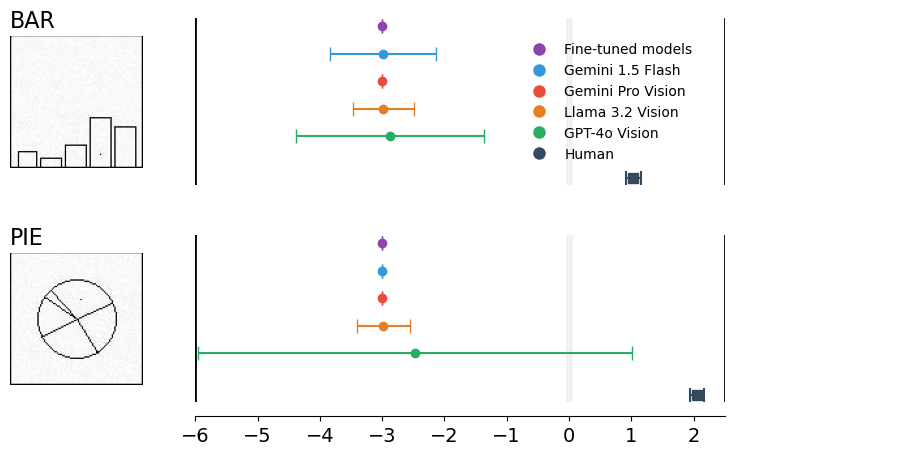

In [5]:
plot_results(average_mlae)

#### Step 3: Perform Statiscal Testing 

- Each error

In [ ]:

individual_mlae = calculate_mlae_individual_EXP2()

perform_statistical_testing(individual_mlae)


🔬 O'Brien Test for Homogeneity of Variances:
F-statistic: 12.4923
P-value: 4.2187e-10
⚠️ Variances are not equal (heteroscedasticity detected). Using Welch’s ANOVA.

📊 Welch's ANOVA Results:
       Source  ddof1        ddof2          F         p-unc       np2
0  model_name      4  1453.770377  25.614002  1.548312e-20  0.025813
⚠️ Significant result: p-value = 1.5483e-20 (p < 0.01)

🔬 Performing Tukey's HSD Post-hoc Test...

📊 Tukey's HSD Post-hoc Test Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.01          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CustomLLaMA  Gemini1_5Flash  -0.1333 0.0001 -0.2289 -0.0378   True
    CustomLLaMA GeminiProVision   -0.134    0.0 -0.2256 -0.0425   True
    CustomLLaMA           LLaMA   0.0759  0.056 -0.0161  0.1678  False
    CustomLLaMA           gpt4o   0.1507 0.0016    0.02  0.2813   True
 Gemini1_5Flash GeminiProVision  -0.0

#### Step 4: Display unique answers

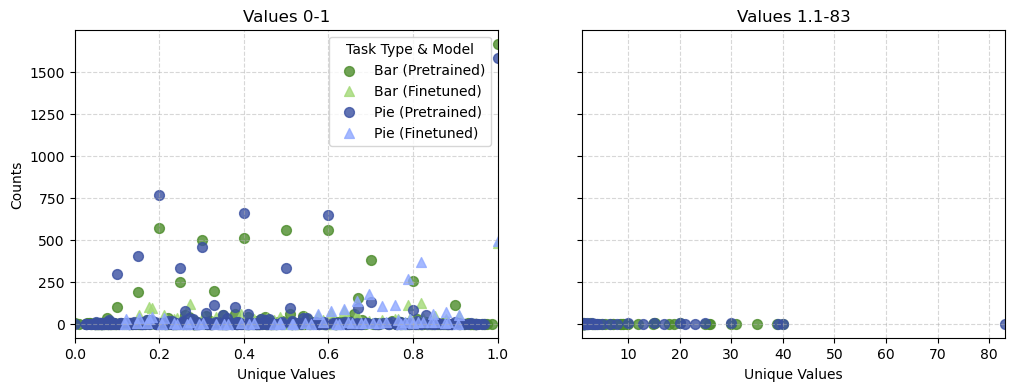

{('bar',
  'Pretrained'): cleaned_answers
 0.00000        5
 0.01000        1
 0.02560        1
 0.03000        3
 0.03400        4
 0.03660        8
 0.03950        1
 0.04170        1
 0.04800        1
 0.04870        7
 0.04878        1
 0.04880        1
 0.05000        5
 0.05260        2
 0.05360        1
 0.05400        1
 0.05560        1
 0.05770        2
 0.05800        3
 0.06000        5
 0.06090        1
 0.06098        1
 0.06100        7
 0.06250        1
 0.06300        2
 0.06380        1
 0.06400        1
 0.06500        3
 0.06980        1
 0.07000        1
 0.07140        4
 0.07310        1
 0.07317        1
 0.07320        7
 0.07500        6
 0.07690       34
 0.07890        1
 0.07900        1
 0.08000       20
 0.08100       14
 0.08110        3
 0.08300        1
 0.08330        2
 0.08500        2
 0.08570        3
 0.08720        1
 0.08800        4
 0.08820        4
 0.09210        1
 0.09375        8
 0.09600        1
 0.09700        2
 0.09756        1
 0.1

In [6]:
from EXP2_clean_balance import visualize_cleaned_answers_overlay

import pandas as pd

visualize_cleaned_answers_overlay(balanced_dataframes)